# Intro

## Aim

- Regularization vs Normalization
- L1 Regularization vs L2 Regularization
- Lp norm, Dropout, Batch Normalization

# Regularization, Normalization

- Regularization: This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. For example, L1, L2 regularization, Dropout, Batch Normalization are in regularization. It prevents overfitting, so train loss might be higher than before but validation, test loss tend to decrease.

- Normalization: the process of translating data into the range [0, 1] (or any other range) or simply transforming data onto the unit sphere. 

Let's compare regularization and normalization with Iris dataset.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


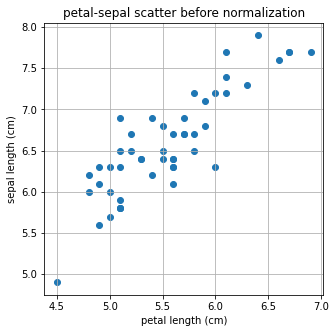

In [3]:
# plot
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']


plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

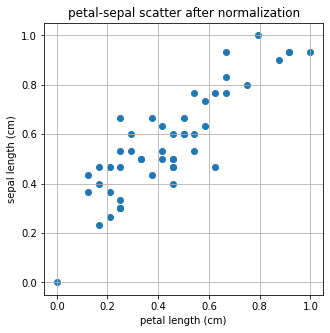

In [4]:
# normalization

from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Let's see regularization now. They have `Lasso` and `Ridge` model

In [5]:
# Regularization

from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


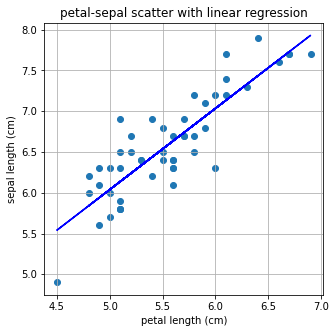

In [7]:
#plot

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


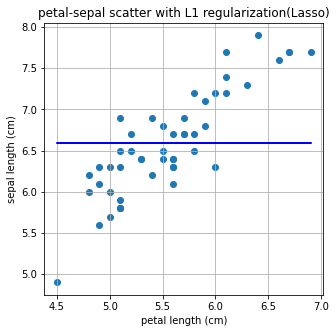

In [8]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


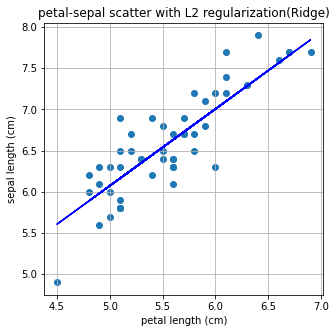

In [9]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

You can see that Linear Regression and L2 Norm are related. So Ridge, which uses L2 Regularization, and Linear Regression have no difference. But why L1 Regualrization couldn't get a correct answer??

Let's find it!